# 1. Install dependecies and Setup

In [ ]:
!pip install tensorflow tensorflow-intel opencv-python matplotlib

In [3]:
import tensorflow as tf
import os

# 2. Clean corrupted images

In [5]:
import cv2
import imghdr

C:\Users\USER\AppData\Local\Temp\ipykernel_29688\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir='data'

In [8]:
image_extentions = ['png', 'jpg', 'jpeg', 'bmp']

In [9]:
for image_class in os.listdir(data_dir):
    print(image_class)

BMW
Hyundai
Mercedes
Range_Rover
volkswagen


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) #read each image to check if the image is a valid image file
            ext = imghdr.what(image_path) #check the image format
            if ext not in image_extentions:
                print('The image is not listed in the extention list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            


# 3. Load data 

In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [204]:
dataset = tf.keras.utils.image_dataset_from_directory('data', labels='inferred', label_mode='categorical') # label_mode='categorical' : apply one-hot encoding directly to the labels within the pipeline 

Found 497 files belonging to 5 classes.


In [205]:
data_iterator = dataset.as_numpy_iterator()

In [206]:
batch = data_iterator.next()

In [207]:
batch[0].shape

(32, 256, 256, 3)

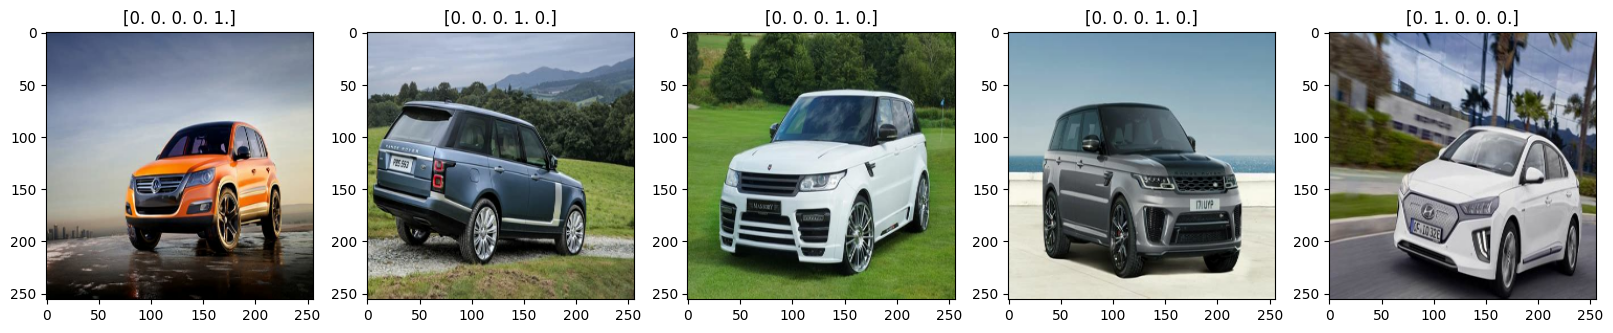

In [208]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [209]:
# 0 : BMW  [1 0 0 0 0]
# 4 : Volkswagon [0 0 0 0 1]
# 3 : Range rover [0 0 0 1 0]
# 2 : Mercedes [0 0 1 0 0 ]
# 1 : Hyundai [0 1 0 0 0]

# 4. Scale Data

In [210]:
data = dataset.map(lambda x,y: (x/255,y))

In [211]:
batch = data.as_numpy_iterator().next()

In [212]:
batch[0].min()

0.0

In [213]:
batch[0].max()

1.0

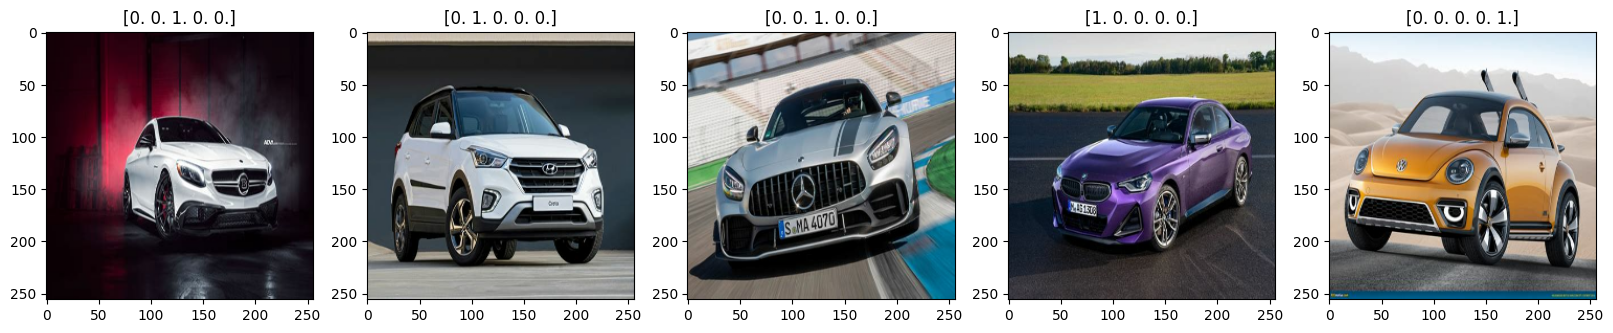

In [214]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [215]:
batch[0].shape

(32, 256, 256, 3)

# 5. Split the data

In [216]:
len(data)

16

In [217]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [218]:
train_size

11

In [219]:
val_size

3

In [220]:
test_size

2

In [221]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [222]:
len(test)

2

# 6. Building a Deep Leaning Model : CNN

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [224]:
model = Sequential()

In [225]:
# Layer 1
# Conv 1
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256, 256, 3)))
# Pooling 1
model.add(MaxPooling2D())

# Layer 2
# Conv 2
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'))
# Pooling 2
model.add(MaxPooling2D())

# Flatten
model.add(Flatten())

# Layer 3
# Fully connected layer 
model.add(Dense(units=256, activation='relu'))

# Layer 4
# Output Layer 
model.add(Dense(units=5, activation='softmax'))  # Use 'softmax' for multiclass classification


In [226]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [227]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 123008)            0         
                                                                 
 dense_12 (Dense)            (None, 256)              

# 7. Train

In [228]:
logdir='logs'

In [229]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [230]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/11
11/11 [==============================] - 37s 3s/step - loss: 7.8733 - accuracy: 0.2188 - val_loss: 2.2075 - val_accuracy: 0.1979
Epoch 2/11
11/11 [==============================] - 25s 2s/step - loss: 1.6768 - accuracy: 0.2330 - val_loss: 1.5502 - val_accuracy: 0.4271
Epoch 3/11
11/11 [==============================] - 25s 2s/step - loss: 1.4889 - accuracy: 0.3750 - val_loss: 1.4410 - val_accuracy: 0.5104
Epoch 4/11
11/11 [==============================] - 24s 2s/step - loss: 1.2368 - accuracy: 0.6392 - val_loss: 1.0470 - val_accuracy: 0.6458
Epoch 5/11
11/11 [==============================] - 24s 2s/step - loss: 0.8194 - accuracy: 0.7557 - val_loss: 0.7020 - val_accuracy: 0.7812
Epoch 6/11
11/11 [==============================] - 25s 2s/step - loss: 0.4903 - accuracy: 0.8835 - val_loss: 0.3307 - val_accuracy: 0.9167
Epoch 7/11
11/11 [==============================] - 25s 2s/step - loss: 0.2254 - accuracy: 0.9489 - val_loss: 0.1462 - val_accuracy: 0.9688
Epoch 8/11
11/11 [==

# 8. Plotting the performance : 

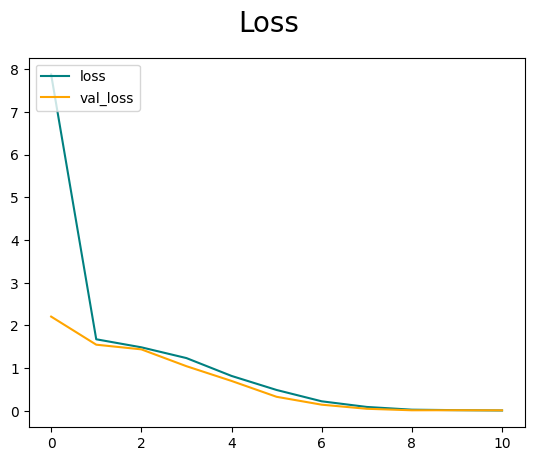

In [231]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

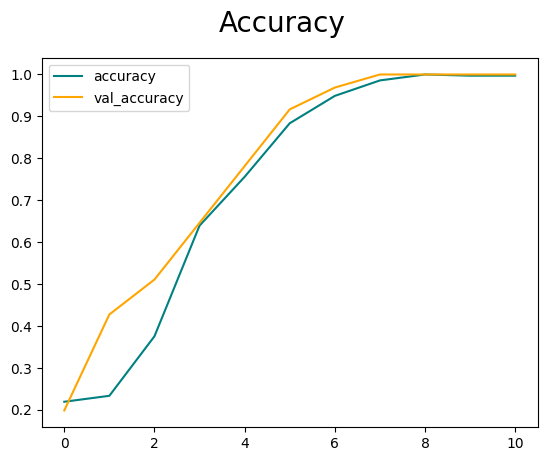

In [232]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluating the model

In [233]:
from tensorflow.keras.metrics import Precision, Recall

In [234]:
pre = Precision()
re = Recall()

In [235]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

1/1 [==============================] - 1s 657ms/step


In [236]:
print(pre.result(), re.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Testing the model with few unseen data

In [238]:
import cv2

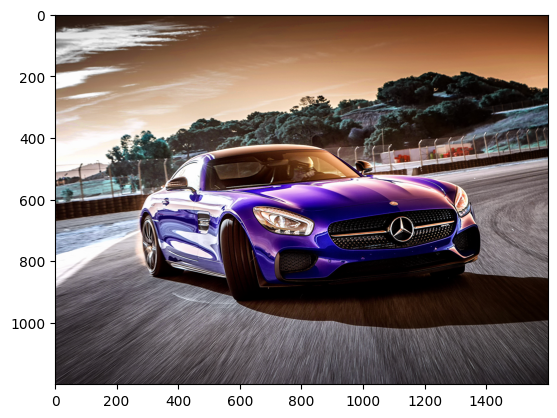

In [239]:
img = cv2.imread('Merecedes_test.jpg')
plt.imshow(img)
plt.show()

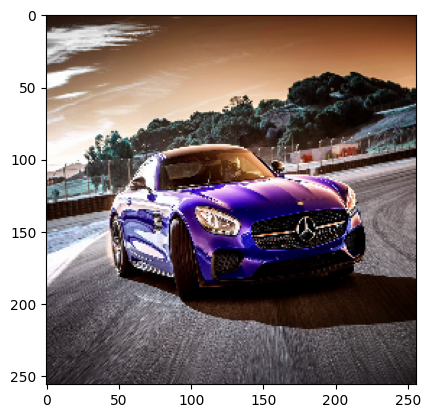

In [240]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [241]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 152ms/step


In [242]:
yhat

array([[3.1364365e-03, 9.2067921e-06, 9.9685353e-01, 5.6247575e-08,
        8.7811401e-07]], dtype=float32)

In [ ]:
# 9.9685353e-01 : 0.996 the highest proba => it is a Merecedes

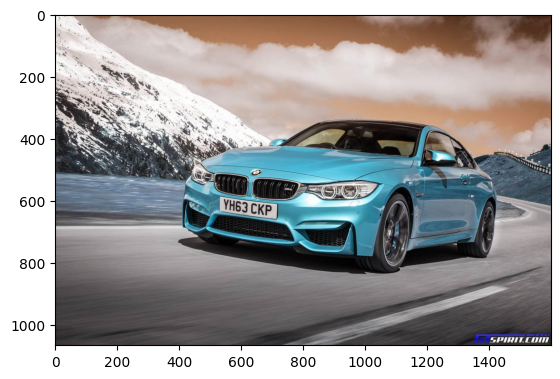

In [258]:
img = cv2.imread('BMW_test.jpg')
plt.imshow(img)
plt.show()

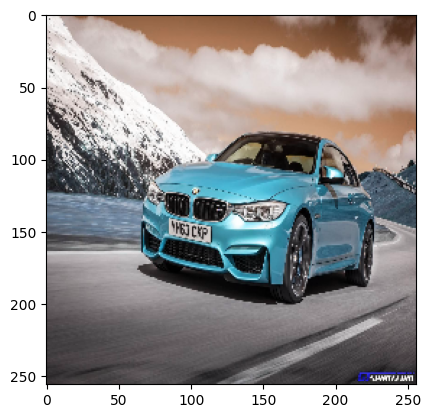

In [259]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [260]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 304ms/step


In [261]:
yhat

array([[9.8581660e-01, 2.0598073e-04, 1.5991458e-03, 9.4575230e-03,
        2.9206439e-03]], dtype=float32)

In [262]:
# 9.8581660e-01 : 0.985... => the predicted car's brand is BMW

In [ ]:
# 0 : BMW  [1 0 0 0 0]
# 1 : Hyundai [0 1 0 0 0]
# 2 : Mercedes [0 0 1 0 0 ]
# 3 : Range rover [0 0 0 1 0]
# 4 : Volkswagon [0 0 0 0 1]

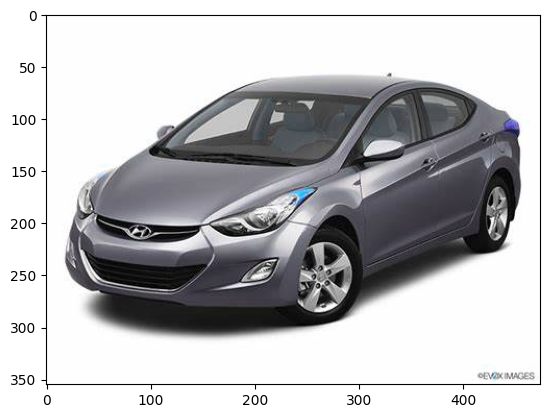

In [267]:
img = cv2.imread('hyun_test.jpg')
plt.imshow(img)
plt.show()

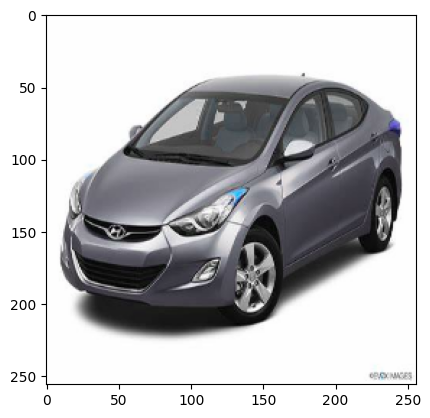

In [268]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [269]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 129ms/step


In [270]:
yhat

array([[0.00820839, 0.45474327, 0.00286226, 0.2296033 , 0.30458274]],
      dtype=float32)

In [271]:
# 0.454 is the highest prob => Hyundai